In [1]:
#Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
print(os.getcwd())

/Users/arnaldofolder/Downloads/Step 6


# Problem Identification

## How can we increase Big Mountain's resort revenues and/or reduce expenses by 1,540,000 in order to keep a profit margin of 9.2% in one year by using the dataset we have available?

### What we know?

Big Mountain Resort was opened in 1947 and offering access to 105 named trials and vast bowl and tree skiing. 

Company’s profit margin is 9.2%. 

Recently installed an additional chair lift to help increase the distribution of visitors across the mountain. This additional chair increases operational costs by $1,540,000.

 Investors want to keep the profit margin in 9.2%.

Some variables to take into consideration: Cost of an adult weekday/weekend chairlift ticket,  projected days open, number of people per chairlifts, state.

### Recommendations and key findings

After having the three different models, we decided to use the model 3 since it was the one that makes more sense to us. For managers, would be almost imposible to work in variables like state, summit elevation, and so on. Therefore, we decided to use variables managers could work on, so the model 3 looked as the best option

However, we were able to see some important information.
The variables that have more impact are the following:
State
Summit Elevation, Base Elevation, and Vertical Drop

### Fit Models with Training Dataset

In the following table, we can see the dataset for the resorts and already ordered.

In [3]:
df_2 = pd.read_csv('Notebook_step3_output_final.csv')

In [4]:
pd.set_option('Max_columns', None)
df_2.head()

,Unnamed: 0,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
0,0,Hilltop Ski Area,Alaska,2090.0,294.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,13.0,1.0,1.0,30.0,30.000000,150.000000,36.0,69.0,30.0,34.00000,152.0,30.0,1
1,1,Sunrise Park Resort,Arizona,11100.0,1800.0,0.0,0.0,0.0,1.0,2.0,3.0,1.0,0.0,7.0,65.0,2.0,1.2,800.0,80.000000,115.000000,49.0,250.0,74.0,78.00000,104.0,80.0,2
2,2,Yosemite Ski & Snowboard Area,California,7800.0,600.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,5.0,10.0,2.0,0.4,88.0,174.873239,110.000000,84.0,300.0,47.0,47.00000,107.0,0.0,2
3,3,Boreal Mountain Resort,California,7700.0,500.0,0.0,0.0,0.0,1.0,1.0,3.0,1.0,2.0,8.0,33.0,6.0,1.0,380.0,200.000000,150.000000,54.0,400.0,49.0,64.16681,150.0,200.0,2
4,4,Dodge Ridge,California,8200.0,1600.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,4.0,12.0,67.0,5.0,2.0,862.0,174.873239,115.103943,69.0,350.0,78.0,78.00000,140.0,0.0,2


In [5]:
columns_df_2 = list(df_2.columns)

In [6]:
#Just drop the unnamed column since it just make noise to the final dataset
df_2 = df_2.drop(columns = columns_df_2[0])

#### Final dataset we worked to make the models

In [7]:
df_2.head()

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
0,Hilltop Ski Area,Alaska,2090.0,294.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,13.0,1.0,1.0,30.0,30.000000,150.000000,36.0,69.0,30.0,34.00000,152.0,30.0,1
1,Sunrise Park Resort,Arizona,11100.0,1800.0,0.0,0.0,0.0,1.0,2.0,3.0,1.0,0.0,7.0,65.0,2.0,1.2,800.0,80.000000,115.000000,49.0,250.0,74.0,78.00000,104.0,80.0,2
2,Yosemite Ski & Snowboard Area,California,7800.0,600.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,5.0,10.0,2.0,0.4,88.0,174.873239,110.000000,84.0,300.0,47.0,47.00000,107.0,0.0,2
3,Boreal Mountain Resort,California,7700.0,500.0,0.0,0.0,0.0,1.0,1.0,3.0,1.0,2.0,8.0,33.0,6.0,1.0,380.0,200.000000,150.000000,54.0,400.0,49.0,64.16681,150.0,200.0,2
4,Dodge Ridge,California,8200.0,1600.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,4.0,12.0,67.0,5.0,2.0,862.0,174.873239,115.103943,69.0,350.0,78.0,78.00000,140.0,0.0,2


#### A recap of the code to have the model we would use to estimate the Big Mountain's Resort Price

In [8]:
#Model 3
#Drop summit_elev and vertical_drop 
# Import the preprocessing package from the sklearn library
from sklearn import preprocessing
# Declare an explanatory variable, called X,and assign it the result of dropping 'summit_elev' and 'vertical_drop' from the df
x = df_2.drop(['Name','state', 'summit_elev','vertical_drop', 'AdultWeekday', 'AdultWeekend'], axis=1)

# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
y = df_2.AdultWeekend

# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scaler = preprocessing.StandardScaler().fit(x)

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
X_scaled=scaler.transform(x) 

In [9]:
# Import the train_test_split function from the sklearn.model_selection utility.  
from sklearn.model_selection import train_test_split
# Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
y = y.ravel()

# Call the train_test_split() function with the first two parameters set to X_scaled and y 
# Declare four variables, X_train, X_test, y_train and y_test separated by commas 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

In [10]:
#Import linear_model from sklearn
#Import explained_variance_score,mean_absolute_error from sklearn.metrics
from sklearn import linear_model

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [11]:
#Predict on the testing dataset and score the model performance with the y_test set and the y-pred values. 
#The explained variance is a measure of the variation explained by the model. 
#This is also known as the R-squared value.
#Use predict() function 
#Make a variable called y_pred and assign it the result of calling predict() 
#Variable parameter X_test
y_pred = lm.predict(X_test)

In [12]:
# You might want to use the explained_variance_score() and mean_absolute_error() metrics.
# To do so, you will need to import them from sklearn.metrics
from sklearn.metrics import explained_variance_score,mean_absolute_error
# You can plug y_test and y_pred into the functions to evaluate the model
variance_score_3 = explained_variance_score(y_test, y_pred)
mean_absolute_error_3 = mean_absolute_error(y_test, y_pred)

In [13]:
print('Variance Score is', variance_score_3)
print('Mean absolute error is', mean_absolute_error_3)

Variance Score is 0.1259754883322719
Mean absolute error is 10.39779228570428


In [14]:
#Print the intercept value from the linear model.
#The intercept is the mean AdultWeekday price for all the resorts given the other characteristics.  
print('The intercept is', lm.intercept_)

The intercept is 56.84708158683219


In [15]:
df_coeff = pd.DataFrame(abs(lm.coef_), x.columns, columns=['Coefficient'])
df_coeff

,Coefficient
trams,0.000000e+00
fastEight,4.440892e-16
fastSixes,0.000000e+00
fastQuads,2.637861e+00
quad,2.655619e+00
triple,2.030229e+00
double,7.242100e-01
surface,2.425592e+00
total_chairs,1.274649e+00
Runs,5.596709e+00


In [16]:
df_coeff['Coefficient'].sort_values(ascending = False)

Runs                 5.596709e+00
clusters             4.750811e+00
quad                 2.655619e+00
fastQuads            2.637861e+00
surface              2.425592e+00
triple               2.030229e+00
daysOpenLastYear     1.957310e+00
averageSnowfall      1.341162e+00
total_chairs         1.274649e+00
Snow Making_ac       1.262172e+00
yearsOpen            1.044784e+00
LongestRun_mi        1.005198e+00
projectedDaysOpen    8.580993e-01
double               7.242100e-01
TerrainParks         5.049631e-01
NightSkiing_ac       5.980718e-02
SkiableTerrain_ac    1.282563e-02
fastEight            4.440892e-16
fastSixes            0.000000e+00
trams                0.000000e+00
Name: Coefficient, dtype: float64

##### To summarize all the data above

Intercept to use: 56.84708158683219

And the coefficients are the following (already sorted from the highest to the lowest)

In [45]:
df_coeff['Coefficient'].sort_values(ascending = False)

Runs                 5.596709e+00
clusters             4.750811e+00
quad                 2.655619e+00
fastQuads            2.637861e+00
surface              2.425592e+00
triple               2.030229e+00
daysOpenLastYear     1.957310e+00
averageSnowfall      1.341162e+00
total_chairs         1.274649e+00
Snow Making_ac       1.262172e+00
yearsOpen            1.044784e+00
LongestRun_mi        1.005198e+00
projectedDaysOpen    8.580993e-01
double               7.242100e-01
TerrainParks         5.049631e-01
NightSkiing_ac       5.980718e-02
SkiableTerrain_ac    1.282563e-02
fastEight            4.440892e-16
fastSixes            0.000000e+00
trams                0.000000e+00
Name: Coefficient, dtype: float64

##### More important variables are:

Runs, clusters, and quads

Higher the coefficient, higher the influence on the ticket price

###### Use the original table to extract the information of Big Mountain Resort in order to replace the values and estimate the ticket price of Big Mountain's Resort

In [ ]:
#Use the data to get the ticket value for Big Mountain Resort

In [18]:
df = pd.read_csv('1589505302_05152020_updated_ski_data_-_updated_ski_data.csv')

In [19]:
df.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,2,0,0,2,7,76.0,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,0,0,4,0,4,36.0,1.0,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,0,1,0,2,3,13.0,1.0,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,2,2,1,2,8,55.0,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,2,3,1,0,7,65.0,2.0,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


In [20]:
big_mountain_resort = df[df['Name'].str.contains('Big Mountain Resort')]

In [21]:
pd.set_option('max_columns', None)
big_mountain_resort

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
151,Big Mountain Resort,Montana,Montana,6817,2353,4464,0,0.0,0,3,2,6,0,3,14,105.0,4.0,3.3,3000.0,600.0,123.0,72.0,333.0,81.0,81.0,123.0,600.0


In [22]:
print(df_coeff)

                    Coefficient
trams              0.000000e+00
fastEight          4.440892e-16
fastSixes          0.000000e+00
fastQuads          2.637861e+00
quad               2.655619e+00
triple             2.030229e+00
double             7.242100e-01
surface            2.425592e+00
total_chairs       1.274649e+00
Runs               5.596709e+00
TerrainParks       5.049631e-01
LongestRun_mi      1.005198e+00
SkiableTerrain_ac  1.282563e-02
Snow Making_ac     1.262172e+00
daysOpenLastYear   1.957310e+00
yearsOpen          1.044784e+00
averageSnowfall    1.341162e+00
projectedDaysOpen  8.580993e-01
NightSkiing_ac     5.980718e-02
clusters           4.750811e+00


In [46]:
df_coeff_array = np.array(df_coeff)

In [50]:
variables_1 = [105.0, 0, 2, 3, 3, 6, 123.0, 333.00, 14, 600, 72.0, 3.3, 123.0, 0, 4.0, 600, 3000,
              0, 0, 0]
variable_1_array = np.array(variables_1)

In [51]:
coefficients_1 = [5.596709e+00, 4.750811e+00, 2.655619e+00, 2.637861e+00, 2.425592e+00, 2.030229e+00, 1.957310e+00,
                   1.341162e+00, 1.274649e+00, 1.262172e+00, 1.044784e+00, 1.005198e+00, 8.580993e-01, 7.242100e-01,
                   5.049631e-01, 5.980718e-02, 1.282563e-02, 2.220446e-16, 2.220446e-16, 0.000000e+00]

In [52]:
intercept = 56.84708158683219

In [53]:
adult_weekend_price_2 = np.dot(variables_1, coefficients_1) + intercept

In [54]:
#Price of 2400 does not make sense
#We need to remove some coefficient to make the price more meaningful
adult_weekend_price_2

2400.1577252868324

### Takeaways

Price of 2400,15 does not make too much sense. 

It is better if we select some variables we considered as important to have a price that makes more sense in order to increase Big Mountain's Resort

In [55]:
#Coefficients to take into consideration
#trams, fastEight, fastSixes, fastQuads, quad, triple, double, surface, TerrainParks, LongestRun_mi

coefficients_2 = [0.000000e+00, 2.220446e-16, 2.220446e-16, 2.637861e+00, 2.655619e+00, 2.030229e+00,7.242100e-01,
               2.425592e+00, 5.049631e-01, 1.005198e+00]
variables_2 = [0, 0, 0, 3.0, 2.0, 6.0, 0.0, 3.0, 4.0, 3.3]


In [56]:
adultWeekend_price_2 = np.dot(coefficients_2, variables_2)+ intercept

In [32]:
print('Price of the ticket should be', adultWeekend_price_2)

Price of the ticket should be 94.86705838683218


## Recommendation

### Ticket price should be 94.86 in order to increase Big Mountain's Resort revenues and keep a profit margin of 9.2%

## Some final graphics to have some final insights

Text(0.5, 1.0, 'summit_elev by vertical_drop by cluster')

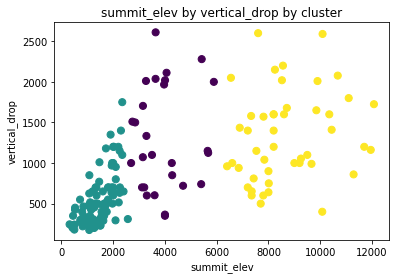

In [34]:
#As part of reviewing the results it is an important step to generate figures to visualize the data story.
#We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values
#Run the example below to get you started and build two or three more figures to include in your data story telling.
plt.scatter(df_2['summit_elev'], df_2['vertical_drop'], c=df_2['clusters'], s=50, cmap='viridis', label ='clusters')
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')

Text(0.5, 1.0, 'total_chairs by projectedDaysOpen by cluster')

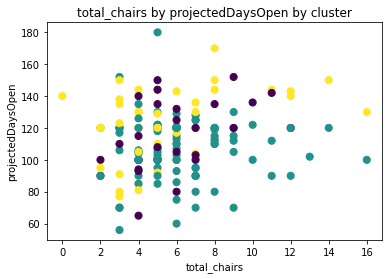

In [35]:
plt.scatter(df_2['total_chairs'], df_2['projectedDaysOpen'], c=df_2['clusters'], s=50, cmap='viridis', label ='clusters')
plt.xlabel('total_chairs')
plt.ylabel('projectedDaysOpen')
plt.title('total_chairs by projectedDaysOpen by cluster')

Text(0.5, 1.0, 'total_chairs by projectedDaysOpen by cluster')

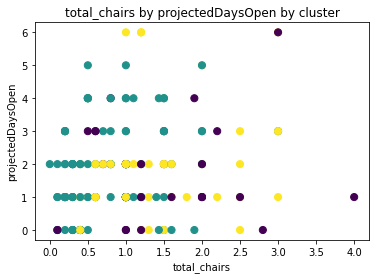

In [36]:
plt.scatter(df_2['LongestRun_mi'], df_2['TerrainParks'], c=df_2['clusters'], s=50, cmap='viridis', label ='clusters')
plt.xlabel('total_chairs')
plt.ylabel('projectedDaysOpen')
plt.title('total_chairs by projectedDaysOpen by cluster')

In [37]:
state_dummies = pd.get_dummies(df_2['state'], prefix = 'state')

In [38]:
df_3 = df.drop(columns = ['state', 'Region'])

In [39]:
df_3.head()

,Name,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,3939,2500,250,1,0.0,0,2,2,0,0,2,7,76.0,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,2600,1540,1200,0,0.0,0,0,0,0,4,0,4,36.0,1.0,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,2090,294,1796,0,0.0,0,0,0,1,0,2,3,13.0,1.0,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,11500,2300,9200,0,0.0,1,0,2,2,1,2,8,55.0,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,11100,1800,9200,0,NaN,0,1,2,3,1,0,7,65.0,2.0,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


In [40]:
df_3 = pd.concat([state_dummies, df_2], axis = 1)

In [41]:
df_3.head()

,state_Alaska,state_Arizona,state_California,state_Colorado,state_Connecticut,state_Idaho,state_Illinois,state_Indiana,state_Iowa,state_Maine,state_Maryland,state_Massachusetts,state_Michigan,state_Minnesota,state_Missouri,state_Montana,state_Nevada,state_New Hampshire,state_New Jersey,state_New Mexico,state_New York,state_North Carolina,state_Ohio,state_Oregon,state_Pennsylvania,state_Rhode Island,state_South Dakota,state_Tennessee,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Hilltop Ski Area,Alaska,2090.0,294.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,13.0,1.0,1.0,30.0,30.000000,150.000000,36.0,69.0,30.0,34.00000,152.0,30.0,1
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Sunrise Park Resort,Arizona,11100.0,1800.0,0.0,0.0,0.0,1.0,2.0,3.0,1.0,0.0,7.0,65.0,2.0,1.2,800.0,80.000000,115.000000,49.0,250.0,74.0,78.00000,104.0,80.0,2
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Yosemite Ski & Snowboard Area,California,7800.0,600.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,5.0,10.0,2.0,0.4,88.0,174.873239,110.000000,84.0,300.0,47.0,47.00000,107.0,0.0,2
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Boreal Mountain Resort,California,7700.0,500.0,0.0,0.0,0.0,1.0,1.0,3.0,1.0,2.0,8.0,33.0,6.0,1.0,380.0,200.000000,150.000000,54.0,400.0,49.0,64.16681,150.0,200.0,2
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Dodge Ridge,California,8200.0,1600.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,4.0,12.0,67.0,5.0,2.0,862.0,174.873239,115.103943,69.0,350.0,78.0,78.00000,140.0,0.0,2


Text(0.5, 1.0, 'summit_elev by state_Alaska by cluster')

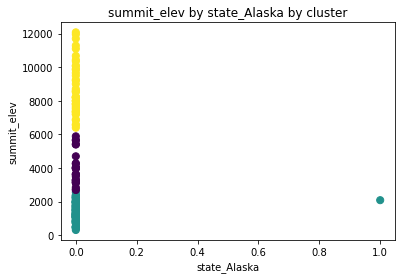

In [42]:
plt.scatter(df_3['state_Alaska'], df_3['summit_elev'], c=df_3['clusters'], s=50, cmap='viridis', label ='clusters')
plt.xlabel('state_Alaska')
plt.ylabel('summit_elev')
plt.title('summit_elev by state_Alaska by cluster')

Finalize Code

In [43]:
import pickle
s = pickle.dumps(model)


In [44]:
from joblib import dump, load
dump(model, 'Models') 

['Models']